In [28]:
# Ta-lib introduction

import numpy as np
from alpha_vantage.timeseries import TimeSeries
import copy
import talib
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

In [12]:
talib.get_function_groups() #get a list of talib functions by group 

tickers = ["MSFT","AAPL","FB","AMZN","INTC","CSCO","VZ","IBM","QCOM","LYFT"]

In [13]:
# Extract OHLCV data for the tickers
ohlc_tech = {} # directory with ohlc value for each stock            

ts = TimeSeries(key='25V9C3YS6OPO9YSE', output_format='pandas') # key=open(key_path,'r').read()

In [14]:
attempt = 0 # initializing passthrough variable
drop = []   # initializing list to store tickers whose close price was successfully extracted

In [15]:
while len(tickers) != 0 and attempt <=100:
    tickers = [j for j in tickers if j not in drop]
    for i in range(len(tickers)):
        try:
            ohlc_tech[tickers[i]] = ts.get_daily(symbol=tickers[i], outputsize='full')[0]
            ohlc_tech[tickers[i]].columns = ["Open","High","Low","Adj Close","Volume"]
            drop.append(tickers[i])      
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1

LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch da

In [16]:
tickers   = ohlc_tech.keys()         # redefine tickers variable after removing any tickers with corrupted data
tickers

dict_keys(['MSFT', 'AAPL', 'FB', 'AMZN', 'INTC', 'CSCO', 'VZ', 'IBM', 'QCOM', 'LYFT'])

In [17]:
ohlc_dict = copy.deepcopy(ohlc_tech) #create a copy of extracted data
ohlc_dict

{'MSFT':                Open      High     Low  Adj Close      Volume
 date                                                        
 2021-05-03  253.400  254.3500  251.12     251.86  19071466.0
 2021-04-30  249.740  253.0800  249.60     252.18  30945098.0
 2021-04-29  255.460  256.1000  249.00     252.51  40589023.0
 2021-04-28  256.078  256.5399  252.95     254.56  46903119.0
 2021-04-27  261.585  263.1900  260.12     261.97  31014213.0
 ...             ...       ...     ...        ...         ...
 1999-11-05   91.810   92.8700   90.50      91.56  35083700.0
 1999-11-04   92.310   92.7500   90.31      91.75  27119700.0
 1999-11-03   92.940   93.5000   91.50      92.00  22258500.0
 1999-11-02   92.750   94.5000   91.94      92.56  23174500.0
 1999-11-01   93.250   94.1900   92.12      92.37  26630600.0
 
 [5410 rows x 5 columns],
 'AAPL':               Open    High      Low  Adj Close       Volume
 date                                                       
 2021-05-03  132.04  134.07 

In [18]:
# Apply talib functions on each dataframe - refer documentation at https://mrjbq7.github.io/ta-lib/doc_index.html
for ticker in tickers:
    # Calculate momentum indicators (e.g. MACD, ADX, RSI etc.) using talib
    ohlc_dict[ticker]["ADX"] = talib.ADX(ohlc_dict[ticker]["High"],
                                        ohlc_dict[ticker]["Low"],
                                        ohlc_dict[ticker]["Adj Close"],
                                        timeperiod=14)
    # Identify chart patterns (e.g. two crows, three crows, three inside, engulging pattern etc.)
    ohlc_dict[ticker]["3I"] = talib.CDL3WHITESOLDIERS(ohlc_dict[ticker]["Open"],
                                                 ohlc_dict[ticker]["High"],
                                                 ohlc_dict[ticker]["Low"],
                                                 ohlc_dict[ticker]["Adj Close"])
    
    # Statistical functions (e.g. beta, correlation etc.)
    ohlc_dict[ticker]["Beta"] = talib.BETA(ohlc_dict[ticker]["High"],
                                         ohlc_dict[ticker]["Low"],
                                         timeperiod=14)

In [19]:
ohlc_dict

{'MSFT':                Open      High     Low  Adj Close      Volume        ADX  3I  \
 date                                                                          
 2021-05-03  253.400  254.3500  251.12     251.86  19071466.0        NaN   0   
 2021-04-30  249.740  253.0800  249.60     252.18  30945098.0        NaN   0   
 2021-04-29  255.460  256.1000  249.00     252.51  40589023.0        NaN   0   
 2021-04-28  256.078  256.5399  252.95     254.56  46903119.0        NaN   0   
 2021-04-27  261.585  263.1900  260.12     261.97  31014213.0        NaN   0   
 ...             ...       ...     ...        ...         ...        ...  ..   
 1999-11-05   91.810   92.8700   90.50      91.56  35083700.0  33.670091   0   
 1999-11-04   92.310   92.7500   90.31      91.75  27119700.0  32.692924   0   
 1999-11-03   92.940   93.5000   91.50      92.00  22258500.0  31.448778   0   
 1999-11-02   92.750   94.5000   91.94      92.56  23174500.0  29.853738   0   
 1999-11-01   93.250   94.1900  

In [20]:
ohlc_dict["AMZN"]

Open      High        Low  Adj Close      Volume        ADX  \
date                                                                           
2021-05-03  3484.7300  3486.645  3372.7012    3386.49   5823607.0        NaN   
2021-04-30  3525.1200  3554.000  3462.5000    3467.42   7009346.0        NaN   
2021-04-29  3505.0981  3514.445  3435.0000    3471.31   7682381.0        NaN   
2021-04-28  3434.8000  3489.880  3425.0000    3458.50   4631884.0        NaN   
2021-04-27  3443.4700  3460.000  3398.0100    3417.43   3827140.0        NaN   
...               ...       ...        ...        ...         ...        ...   
1999-11-05    64.7500    65.500    62.2500      64.94  11091400.0  16.650117   
1999-11-04    67.1900    67.190    61.0000      63.06  16759200.0  16.174862   
1999-11-03    68.1900    68.500    65.0000      65.81  10772100.0  15.468866   
1999-11-02    69.7500    70.000    65.0600      66.44  13243200.0  14.510482   
1999-11-01    68.0600    71.880    66.3100      69.13  12824100.0  13.699860   

            3I      Beta  
date                      
2021-05-03   0       NaN  
2021-04-30   0       NaN  
2021-04-29   0       NaN  
2021-04-28   0       NaN  
2021-04-27   0       NaN  
...         ..       ...  
1999-11-05   0  0.140885  
1999-11-04   0  0.082897  
1999-11-03   0  0.125362  
1999-11-02   0  0.135211  
1999-11-01   0  0.166938  

[5410 rows x 8 columns]

In [26]:
for ticker in tickers:
    ohlc_dict[ticker].dropna(inplace=True)
ohlc_dict

{'MSFT':                Open     High       Low  Adj Close      Volume        ADX  3I  \
 date                                                                           
 2021-03-24  237.845  238.000  235.3200     235.46  25620127.0  35.724426   0   
 2021-03-23  237.485  241.050  237.0700     237.58  31638376.0  34.982093   0   
 2021-03-22  230.270  236.900  230.1400     235.99  30127005.0  35.428272   0   
 2021-03-19  231.020  232.474  229.3496     230.35  46430730.0  35.949561   0   
 2021-03-18  232.560  234.190  230.3300     230.72  34852251.0  35.860345   0   
 ...             ...      ...       ...        ...         ...        ...  ..   
 1999-11-05   91.810   92.870   90.5000      91.56  35083700.0  33.670091   0   
 1999-11-04   92.310   92.750   90.3100      91.75  27119700.0  32.692924   0   
 1999-11-03   92.940   93.500   91.5000      92.00  22258500.0  31.448778   0   
 1999-11-02   92.750   94.500   91.9400      92.56  23174500.0  29.853738   0   
 1999-11-01   93.250

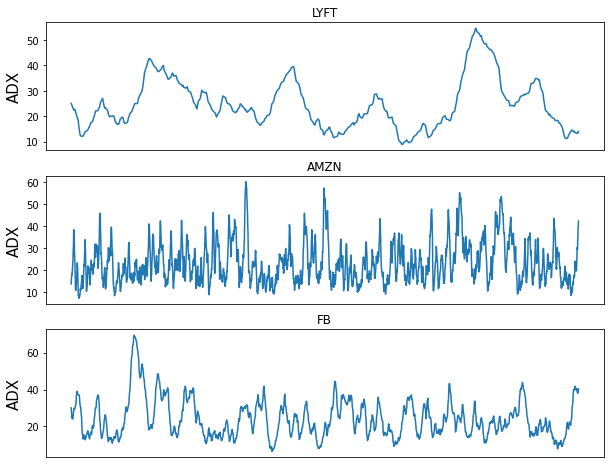

In [46]:
plt.subplot(311)
plt.plot(ohlc_dict["LYFT"]["ADX"])
plt.title('LYFT')
plt.xticks([])
plt.ylabel("ADX", size= 15)

plt.subplot(312)
plt.plot(ohlc_dict["AMZN"]["ADX"])
plt.title('AMZN')
plt.xticks([])
plt.ylabel("ADX", size= 15)

plt.subplot(313)
plt.plot(ohlc_dict["FB"]["ADX"])
plt.title('FB')
plt.xticks([])
plt.ylabel("ADX", size= 15)

plt.show()

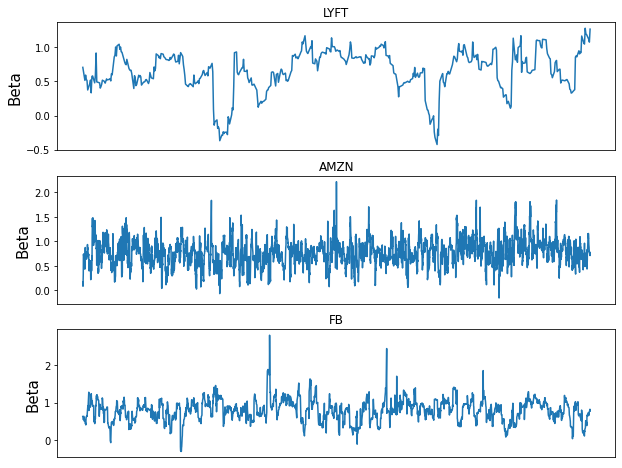

In [47]:
plt.subplot(311)
plt.plot(ohlc_dict["LYFT"]["Beta"])
plt.title('LYFT')
plt.xticks([])
plt.ylabel("Beta", size= 15)

plt.subplot(312)
plt.plot(ohlc_dict["AMZN"]["Beta"])
plt.title('AMZN')
plt.xticks([])
plt.ylabel("Beta", size= 15)

plt.subplot(313)
plt.plot(ohlc_dict["FB"]["Beta"])
plt.title('FB')
plt.xticks([])
plt.ylabel("Beta", size= 15)

plt.show()